<a href="https://colab.research.google.com/github/stevengregori92/RandomForestRegressor-part-2/blob/main/INcome_with_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 35.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 93.4 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366830 sha256=de534807185e6048e04b755e34524e1603fe544ddeda0c92cbca37d6044ebdd0
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=2e1d01ace1cbd1bba9e8ee3e47965d615f77669c38ad8843d9bb2807adbcbbfe
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

#Import Dataset

In [3]:
!gdown https://drive.google.com/uc?id=1BZfX49zzVEmO3NToR9nHyEfQr5_enDGG

Downloading...
From: https://drive.google.com/uc?id=1BZfX49zzVEmO3NToR9nHyEfQr5_enDGG
To: /content/income.zip
100% 262k/262k [00:00<00:00, 131MB/s]


In [4]:
!unzip /content/income.zip

Archive:  /content/income.zip
  inflating: gapminder.csv           


In [5]:
data = pd.read_csv('gapminder.csv', index_col='Unnamed: 0')
data

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
1,Albania,1960,115.40,62.87,6.19,1636054.0,NaN,Europe,Southern Europe
2,Algeria,1960,148.20,47.50,7.65,11124892.0,1.382815e+10,Africa,Northern Africa
3,Angola,1960,208.00,35.98,7.32,5270844.0,NaN,Africa,Middle Africa
4,Antigua and Barbuda,1960,NaN,62.97,4.43,54681.0,NaN,Americas,Caribbean
5,Argentina,1960,59.87,65.39,3.11,20619075.0,1.083223e+11,Americas,South America
...,...,...,...,...,...,...,...,...,...
10541,West Bank and Gaza,2016,NaN,74.70,NaN,NaN,NaN,Asia,Western Asia
10542,Vietnam,2016,NaN,75.60,NaN,NaN,NaN,Asia,South-Eastern Asia
10543,Yemen,2016,NaN,64.92,NaN,NaN,NaN,Asia,Western Asia
10544,Zambia,2016,NaN,57.10,NaN,NaN,NaN,Africa,Eastern Africa


#Cleaning Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10545 entries, 1 to 10545
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           10545 non-null  object 
 1   year              10545 non-null  int64  
 2   infant_mortality  9092 non-null   float64
 3   life_expectancy   10545 non-null  float64
 4   fertility         10358 non-null  float64
 5   population        10360 non-null  float64
 6   gdp               7573 non-null   float64
 7   continent         10545 non-null  object 
 8   region            10545 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 823.8+ KB


,missing_value,%
country,0,0.00
year,0,0.00
infant_mortality,1453,13.78
life_expectancy,0,0.00
fertility,187,1.77
population,185,1.75
gdp,2972,28.18
continent,0,0.00
region,0,0.00


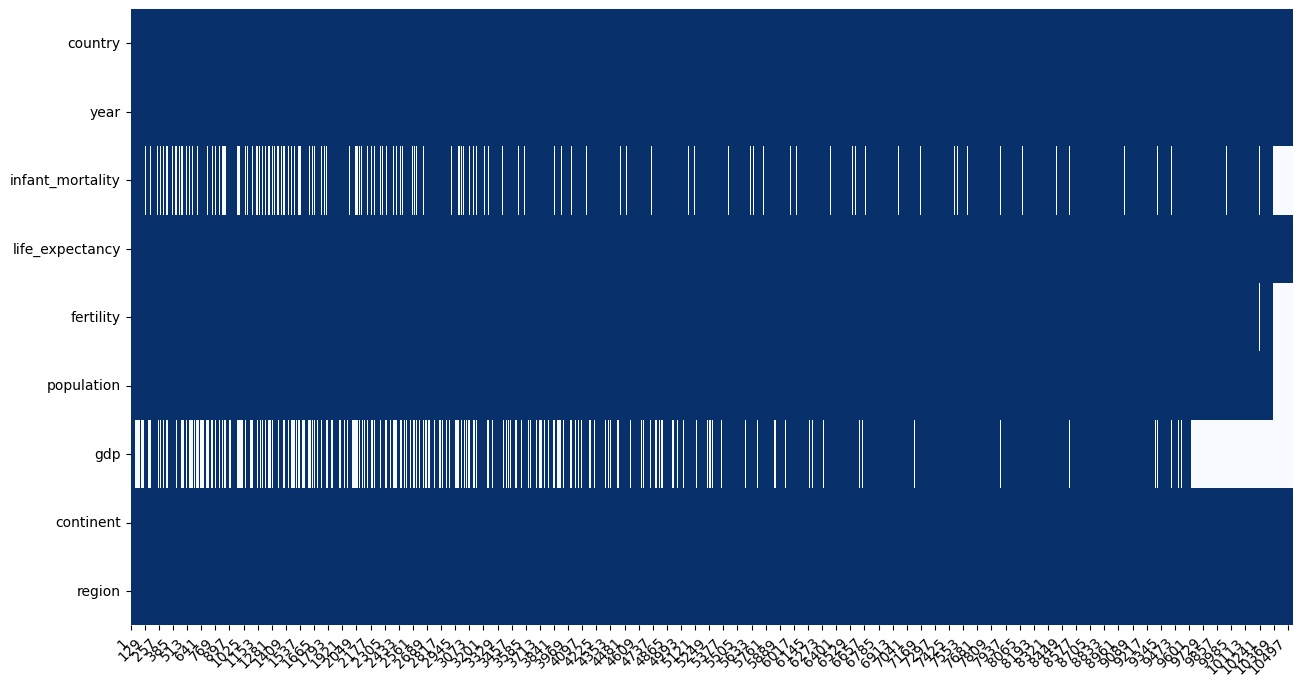

In [7]:
plot_missing_value(data, return_df=True)

In [25]:
data = data[:1500]
data

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
1,Albania,1960,115.40,62.87,6.19,1636054.0,NaN,Europe,Southern Europe
2,Algeria,1960,148.20,47.50,7.65,11124892.0,1.382815e+10,Africa,Northern Africa
3,Angola,1960,208.00,35.98,7.32,5270844.0,NaN,Africa,Middle Africa
4,Antigua and Barbuda,1960,NaN,62.97,4.43,54681.0,NaN,Americas,Caribbean
5,Argentina,1960,59.87,65.39,3.11,20619075.0,1.083223e+11,Americas,South America
...,...,...,...,...,...,...,...,...,...
1496,Belgium,1968,21.90,70.55,2.36,9589107.0,9.725501e+10,Europe,Western Europe
1497,Belize,1968,75.50,64.67,6.34,116061.0,1.299298e+08,Americas,Central America
1498,Benin,1968,161.50,42.69,6.67,2788551.0,7.918979e+08,Africa,Western Africa
1499,Bhutan,1968,192.10,40.66,6.67,273868.0,NaN,Asia,Southern Asia


#Dataset Splitting

In [26]:
X = data.drop(columns=['life_expectancy'])
y = data.life_expectancy

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 8), (300, 8), (1200,), (300,))

#Training

In [27]:
X_train.columns

Index(['country', 'year', 'infant_mortality', 'fertility', 'population', 'gdp',
       'continent', 'region'],
      dtype='object')

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [29]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling = 'robust'), ['year', 'infant_mortality', 'fertility', 'population', 'gdp']),
    ('categoric', cat_pipe(encoder='onehot'), ['country', 'continent', 'region'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv = 3, n_iter=50, n_jobs=-1, verbose =1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 26, 'algo__max_features': 0.4810613326357327, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 107}
0.9978377471132445 0.966195739547948 0.9884894809216558
